
# Ranking Courrieros

Importando a base de dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pd.read_excel('Biker Tasks.xls',sep=',').head()

,Código Pedido,Número Externo,Data do evento,Status,Biker,Registrado por
0,3018243482211537,P20180831T18,03/09/2018,Entregue,Petronio,petronio
1,4018243436281229,V516111MSD-01,31/08/2018,Entregue,Leonardo José de Oliveira,leonardoj
2,4018243377357597,20641,01/09/2018,Entregue,Caio Ferreira Santos,rogeriob
3,4018243507140908,GSL1138752,01/09/2018,Entregue,tomy,rogeriov
4,4018243636408427,GSL1138679,31/08/2018,Entregue,Cleber Gonzaga,cleber


In [4]:
chuva=[0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]

http://www.inmet.gov.br/sim/abre_graficos.php

In [5]:
dados=pd.read_excel('Biker Tasks.xls',sep=',')

In [6]:
dados.Biker = dados.Biker.astype('category')
dados['Data do evento'] = dados['Data do evento'].astype('category')

In [7]:
i=0
noutubro=[]
codprod=[]
codrep=[]
andrey=[]
while i<dados.Biker.count():
    a=dados['Data do evento'][i].split('/')
    b=dados['Código Pedido'][i]
    c=dados.Biker[i]
    if b in codprod:
        codrep.append(i)
    else:
        codprod.append(b)
    if a[1]!='08':
        noutubro.append(i)
    if c == 'Andrey Monteiro':
        andrey.append(i)
    i=i+1

In [8]:
uniao=list(set().union(noutubro,codrep,andrey))

In [9]:
newdados=dados.drop(uniao)

In [10]:
len(newdados)

4745

In [11]:
newdados.head()

,Código Pedido,Número Externo,Data do evento,Status,Biker,Registrado por
1,4018243436281229,V516111MSD-01,31/08/2018,Entregue,Leonardo José de Oliveira,leonardoj
4,4018243636408427,GSL1138679,31/08/2018,Entregue,Cleber Gonzaga,cleber
5,4018243729616237,GSL1138737,31/08/2018,Entregue,Luciano Aparecido Rodrigues,lucianoa
6,4018243250625262,GSL1138777,31/08/2018,Entregue,Luciano Aparecido Rodrigues,lucianoa
7,4018243192823940,WEB1138724,31/08/2018,Entregue,Luciano Aparecido Rodrigues,lucianoa


Coletando os biker que entregaram

In [12]:
dados2=newdados[(newdados.Status=='Entregue')]

In [13]:
ent=newdados.Biker.value_counts().sort_index()
datas=dados2['Data do evento']

In [14]:
newdatas=datas.value_counts().sort_index()
newdatas.head()

01/08/2018    120
01/09/2018      0
02/08/2018    120
03/08/2018    118
03/09/2018      0
Name: Data do evento, dtype: int64

In [15]:
newdatas2=newdatas[(newdatas != 0)]
dados2=newdados[(newdados.Status=='Entregue')]

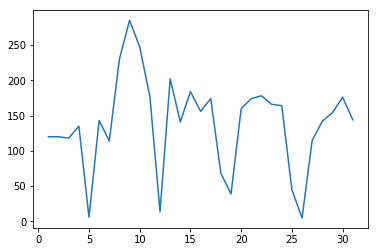

In [16]:
y=list(newdatas2)
x=list(range(1,32))
plt.plot(x,y,'-')

In [17]:
dados2.Biker = dados2.Biker.astype('category')

C:\Users\carlo\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [18]:
dados2.Biker.value_counts().sort_index().head()

Alex Sandro Ribeiro dos Santos    61
Alexandre Arnaldo Aguiar          37
Anderson Ferreira                 83
Anderson da Silva V                2
Andre Biselli                      7
Name: Biker, dtype: int64

In [19]:
ent.head()

Alex Sandro Ribeiro dos Santos    63
Alexandre Arnaldo Aguiar          37
Anderson Ferreira                 91
Anderson da Silva V                2
Andre Biselli                     36
Name: Biker, dtype: int64

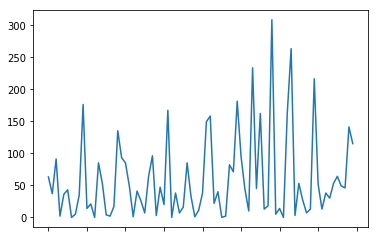

In [20]:
ent.plot()

In [31]:
A=min(ent)
B=max(ent)
notas=[]
i=0
while i<len(ent):
    notas.append(1+(ent[i]-A)*4/(B-A))
    i=i+1
notas

[1.8181818181818183,
 1.4805194805194806,
 2.1818181818181817,
 1.025974025974026,
 1.4675324675324675,
 1.5584415584415585,
 1.0,
 1.0649350649350648,
 1.4545454545454546,
 3.2857142857142856,
 1.1818181818181819,
 1.2727272727272727,
 1.0,
 2.103896103896104,
 1.6883116883116882,
 1.051948051948052,
 1.025974025974026,
 1.2207792207792207,
 2.7532467532467533,
 2.207792207792208,
 2.103896103896104,
 1.6363636363636362,
 1.0129870129870129,
 1.5324675324675323,
 1.3376623376623376,
 1.0909090909090908,
 1.8311688311688312,
 2.2467532467532467,
 1.0389610389610389,
 1.6103896103896105,
 1.2597402597402598,
 3.168831168831169,
 1.0,
 1.4935064935064934,
 1.0909090909090908,
 1.2077922077922079,
 2.103896103896104,
 1.4285714285714286,
 1.0129870129870129,
 1.1428571428571428,
 1.4935064935064934,
 2.9350649350649354,
 3.051948051948052,
 1.2857142857142856,
 1.5194805194805194,
 1.0,
 1.025974025974026,
 2.0649350649350646,
 1.922077922077922,
 3.3506493506493507,
 2.233766233766234,
 

In [ ]:
#for n in range(0,len(notas)):
 #   dados2.Biker[n]
  #  notas[n]
   # dados.loc[, 'Entregas']= 1
   # dados.loc[dados.Status=='Não Entregue', 'Entregas']= 0
    #dados.head()

In [22]:
ent

Alex Sandro Ribeiro dos Santos         63
Alexandre Arnaldo Aguiar               37
Anderson Ferreira                      91
Anderson da Silva V                     2
Andre Biselli                          36
Andre Felipe                           43
Andrey Monteiro                         0
B1                                      5
B2                                     35
Baltazar Gomes Ruiz Junior            176
Biker 01                               14
BikerRESERVA                           21
Bruno Castro                            0
Bruno Strano                           85
Caio Ferreira Santos                   53
Caio Vinicius Pereira                   4
Carlos Pingo                            2
Claudio Alves Pinheiro                 17
Clayton Leoncio dos Santos            135
Cleber Gonzaga                         93
Daniel Hisatugu                        85
Daniel Zacharias                       49
Danilo Mendes TI                        1
David Felipe de Sousa             

In [23]:
ent[0]

63

In [24]:
len(ent)

80

In [25]:
len(notas)

80